# Ford GoBike System Data
## by Fatma ElBoshy


## Investigation Overview

> The overall goals of my investigation is to answer the following questions:
1. What's the common age range?
2. How long does the average trip take?
3. What is the percentage of each gender participating?
4. What is the age range for each gender group?
5. Finally, what is the distance crossed for each age group?

## Dataset Overview

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
#loading the data and exploring its shape and features data type
df= pd.read_csv('bike_data.csv')
print(df.shape)
print(df.dtypes)
df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#checking for null values in dataset
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#eliminating unnecessary columns that we won't be using
df.drop(["end_station_id", "start_station_id"], axis = 1, inplace = True) 
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#eliminating  the remaining rows with null values
df.dropna(axis=0, inplace = True) 
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
#final check that there are no duplicated rows
df.duplicated().sum()

0

In [10]:
#checking the final shape of the dataset
df.shape

(174952, 14)


> My dataset is 183412 rows and 17 column, after cleaning it became 174952 rows and 14 column

> The main features I'm interested in are 'distatnce' as our dependent variable. I will extract it from the start coorinates and end coordinates.

> 'user_type', 'member_birth_year', 'member_gender' as well as 'duration_sec' as our independent variables.

## Univariate Exploration


In [11]:
# a function to calulate the distance in kilometer 
#using start  and end points coordinats
def distance(lat_start, lon_start, lat_end, lon_end):
    R = 6373.0 #radius of the Earth
    lat1 = np.radians(lat_start)
    lon1 = np.radians(lon_start) 
    lat2 = np.radians(lat_end) 
    lon2 = np.radians(lon_end)
    dlon = lon2 - lon1 #change in coordinates
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    dist = R * c
    return dist

In [12]:
#engineering (calculating) a new feature 'distance'
df['distance']= distance(df['start_station_latitude'], df['start_station_longitude'], df['end_station_latitude'], df['end_station_longitude'])
df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544879
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.705394
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260820
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.410058
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.333249


In [13]:
#converting the duration into 'minutes' and 'hours'
df['duration_min']=df['duration_sec']/60
df['duration_hr']=df['duration_min']/60

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544879,869.750000,14.495833
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.705394,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260820,608.166667,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.410058,26.416667,0.440278
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.333249,29.883333,0.498056


In [15]:
#calculating 'age' from the given birth year
df['age']=2020- df['member_birth_year']

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,duration_min,duration_hr,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544879,869.750000,14.495833,36.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.705394,1030.900000,17.181667,48.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260820,608.166667,10.136111,31.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.410058,26.416667,0.440278,46.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.333249,29.883333,0.498056,61.0


## Age Distribution

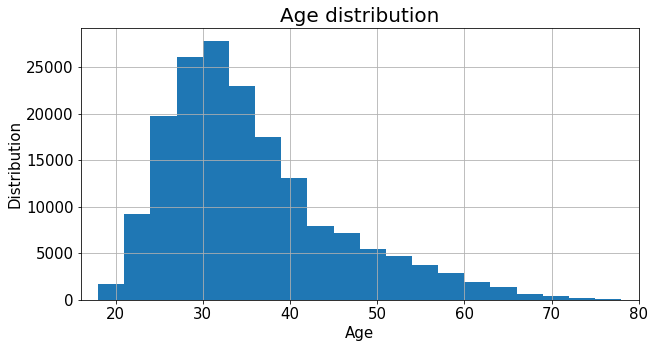

In [36]:
plt.figure(figsize=(20,10))
df['age'].hist(bins=np.arange(0, df['age'].max()+0.3, 3))
plt.xlim(16,80)
plt.title('Age distribution', fontsize=25)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Distribution', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### The distribution is pretty normally distributed with some outliers, we can conclude that the avrage age of bikers is from 25 to 40 years old. The more the age increases, the less people tend to ride bikes.

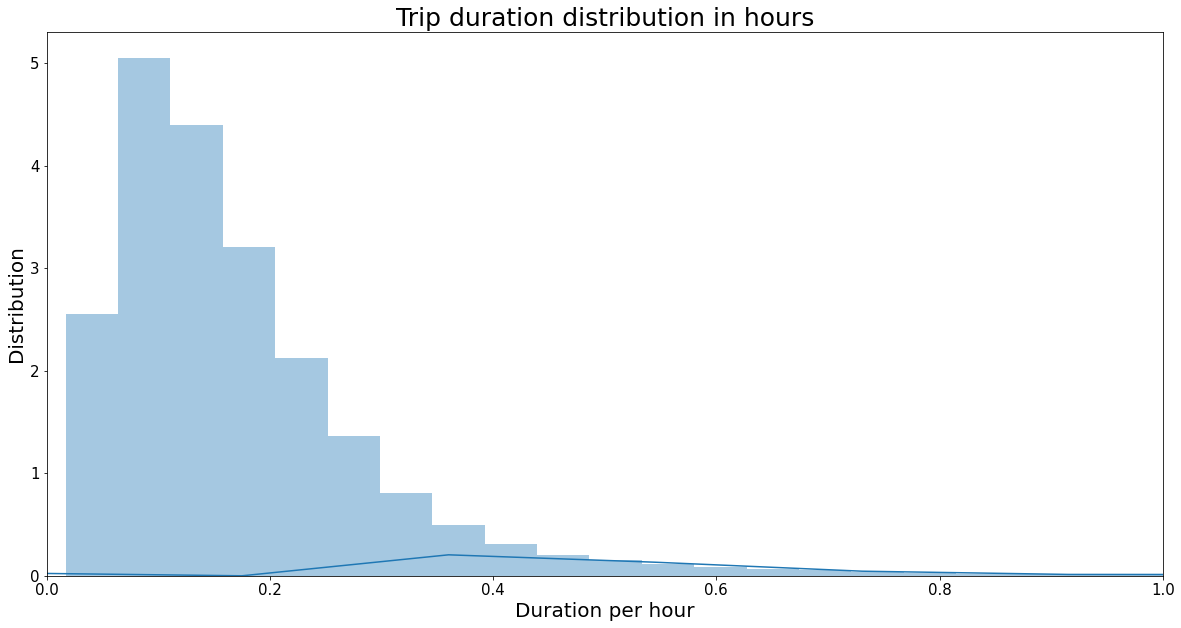

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sb.distplot(df['duration_hr'], bins=500)
plt.xlim(0,1)
plt.title('Trip duration distribution in hours', fontsize= 25)
plt.xlabel('Duration per hour', fontsize= 20)
plt.ylabel('Distribution', fontsize=20);

#### We conclude from the pervious plot that most people go on trips ranging from 0.1 to 0.22 hours

## How long does a trip usually take?
> duration-wise and distance-wise

## Duration distribution

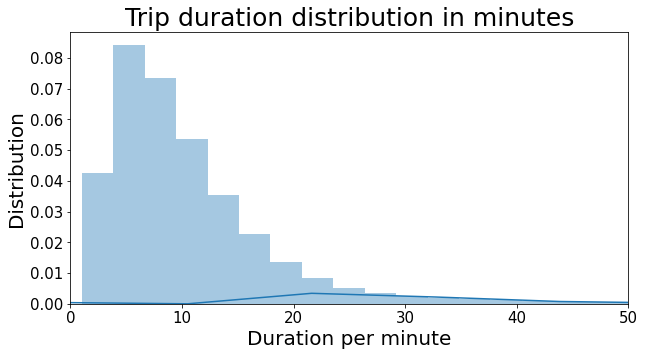

In [37]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sb.distplot(df['duration_min'], bins=500)
plt.xlim(0,50)
plt.title('Trip duration distribution in minutes', fontsize=25)
plt.xlabel('Duration per minute',fontsize=20)
plt.ylabel('Distribution', fontsize=20);

#### It's pretty much the same plot as the pervious one but in more details, so the specific most common trip duration ranges between 5 minutes and 15 minutes approximately.

## Distance Distribution

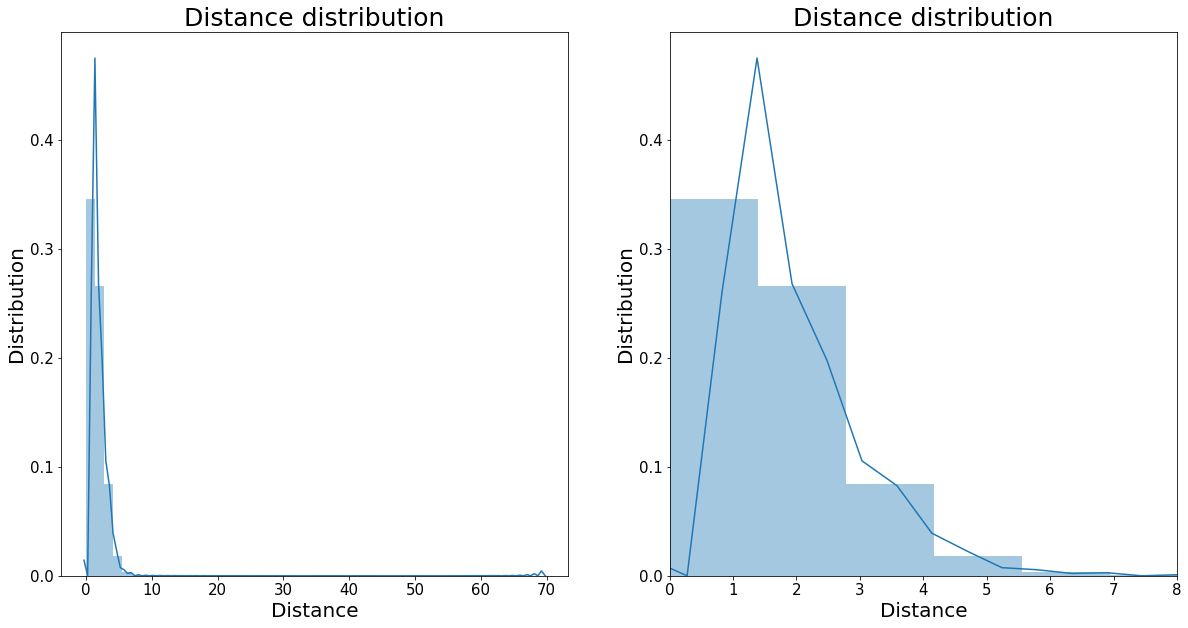

In [43]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sb.distplot(df['distance'])
plt.title('Distance distribution', fontsize=25)
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Distribution', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sb.distplot(df['distance'])
plt.xlim(0,8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distance distribution', fontsize=25)
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Distribution',fontsize=20);

#### The distance distribution is a little skewed, but we can conclude that people tend to go for short trips, usually between 100 m and 2.5 km max.

In [22]:
df['distance'].describe()

count    174952.000000
mean          1.690580
std           1.097301
min           0.000000
25%           0.910729
50%           1.430278
75%           2.224708
max          69.491049
Name: distance, dtype: float64

In [23]:
df['duration_hr'].describe()

count    174952.000000
mean          0.195556
std           0.456168
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hr, dtype: float64

In [24]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

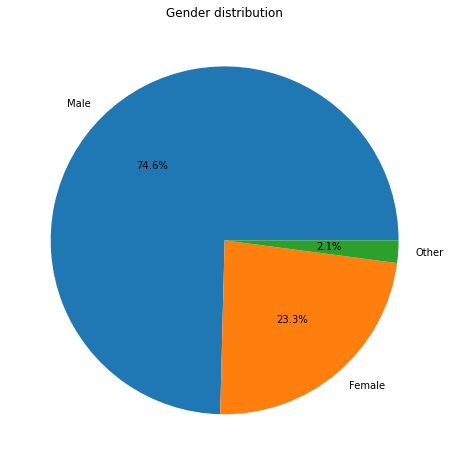

In [25]:
plt.figure(figsize=(8,8))
df['member_gender'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.title('Gender distribution')
plt.ylabel('');

#### From the pie chart we can clearly see that biking is much more common among 'males' that any other gender.

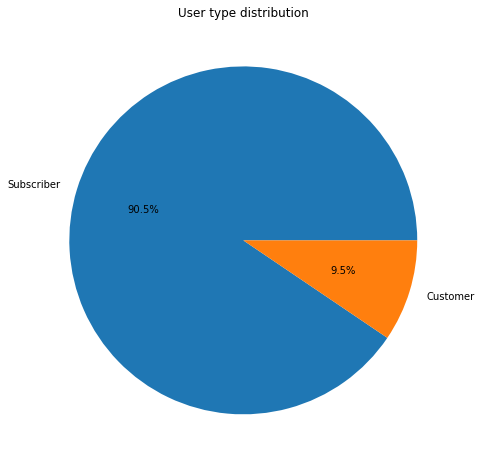

In [26]:
plt.figure(figsize=(8,8))
df['user_type'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.title('User type distribution')
plt.ylabel('');

#### We can also see that subscriber individuals make up most of our data observations.

### The distribution of the dependent variable (feature of interest):

> My variable of interest is 'distance', there were a lot of unusal points since the distance crossed at 75% is 2.2 km, while the max distances crossed is 69.5 km, I didn't need to perform any transformations on the variable itself but I had to use 'plt.xlim' to exclude outliers. 


### The distribution of the independent variables:

> As for the 'duration_sec' feature, I had to transform it into minutes or hours to be more comprehensible, as for the distribution of minutes, it was similar to the distribution of distance with avrage 13.15 minute at 75% and maximum duration of 23.5 hours. 

> As for the 'age' distribution, it was pretty normally distributed with some outliers, we can conclude that the avrage age of bikers is from 25 to 40 years old. The more the age increases, the less people tend to ride bikes.

> From the distribution of 'gender' we can see that 74.6% of bikers are males, while only 2.1% are categorized as 'others' with the rest being females.

> As for the user, it's apparent that most of the bikers are 'subscribers' with percentage of 90.5%

> The average trip takes about 11.73 minute.

## Bivariate Exploration


## Gender vs User type

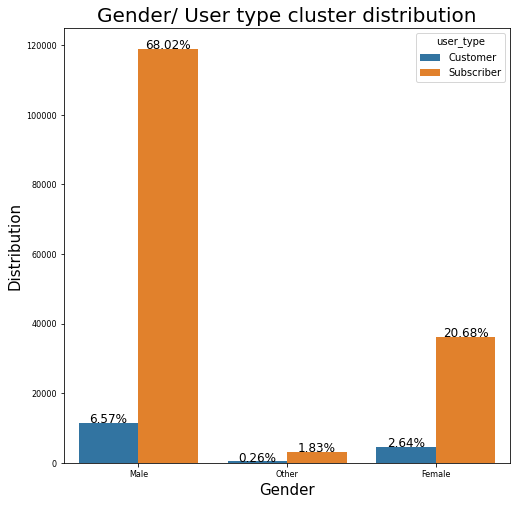

In [27]:
plt.figure(figsize=(8,8))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax=sb.countplot(data =df, x = 'member_gender', hue = 'user_type')
plt.title('Gender/ User type cluster distribution', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Distribution',fontsize=15)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:1.2f}%'.format((height/total)*100),ha="center",fontsize=12) 
plt.show();

#### As we observe, Subscribers make up pretty much most of each gender group.

## Gender vs Age

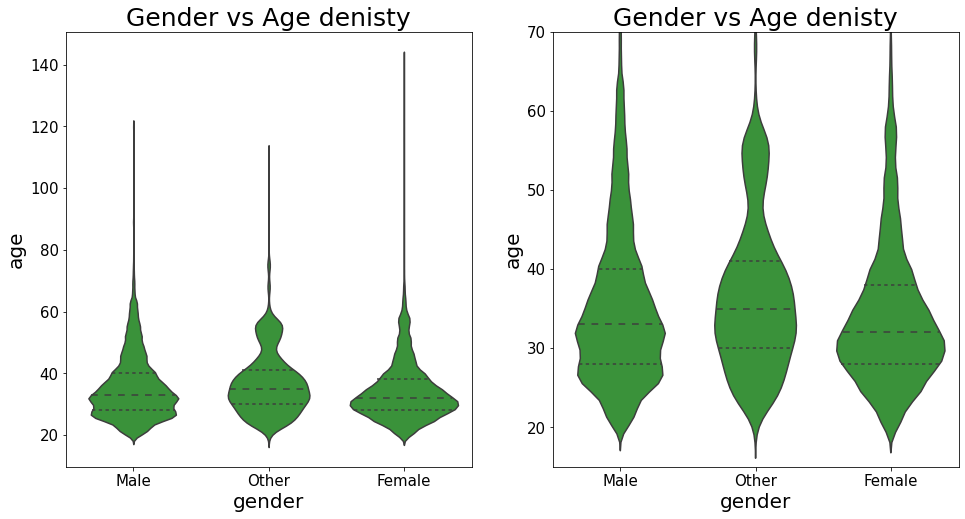

In [28]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sb.violinplot(data =df, x = 'member_gender', y = 'age', inner= 'quartile',color= sb.color_palette()[2])
plt.title('Gender vs Age denisty',fontsize=25)
plt.xlabel('gender', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sb.violinplot(data =df, x = 'member_gender', y = 'age', inner= 'quartile',color= sb.color_palette()[2])
plt.ylim(15,70)
plt.title('Gender vs Age denisty', fontsize=25)
plt.xlabel('gender', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### At older ages,between age 50 and 60, 'others' gender tend to ride bikes more than either males or females peers. But above 30s 'males' tend to ride bikes more while females around 30 years old tend to ride bikes more than the other 2 groups

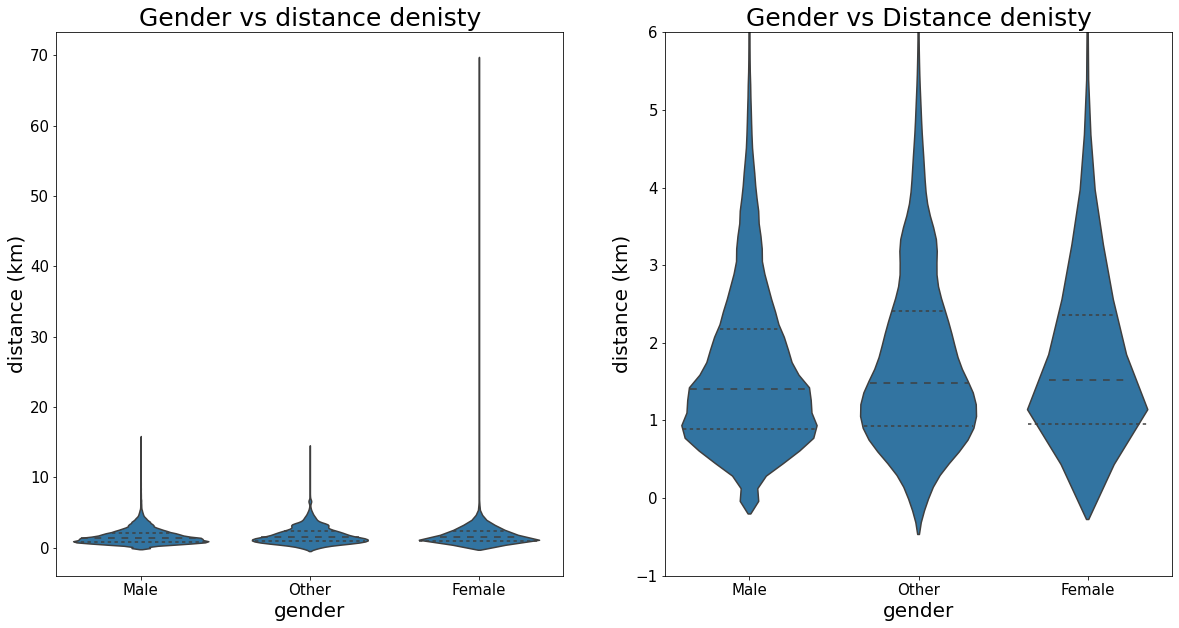

In [29]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sb.violinplot(data =df, x = 'member_gender', y = 'distance', inner= 'quartile',color= sb.color_palette()[0])
plt.title('Gender vs distance denisty', fontsize=25)
plt.xlabel('gender',fontsize=20)
plt.ylabel('distance (km)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sb.violinplot(data =df, x = 'member_gender', y = 'distance', inner= 'quartile',color= sb.color_palette()[0])
plt.ylim(-1,6)
plt.title('Gender vs Distance denisty', fontsize=25)
plt.xlabel('gender',fontsize=20)
plt.ylabel('distance (km)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### All the three genders tend to cross roughly the same distance on avrage, but crossing a distance of a little less than1 km seems to be a tren among 'males' while 'females' tend to cross a distance of about 1 km.

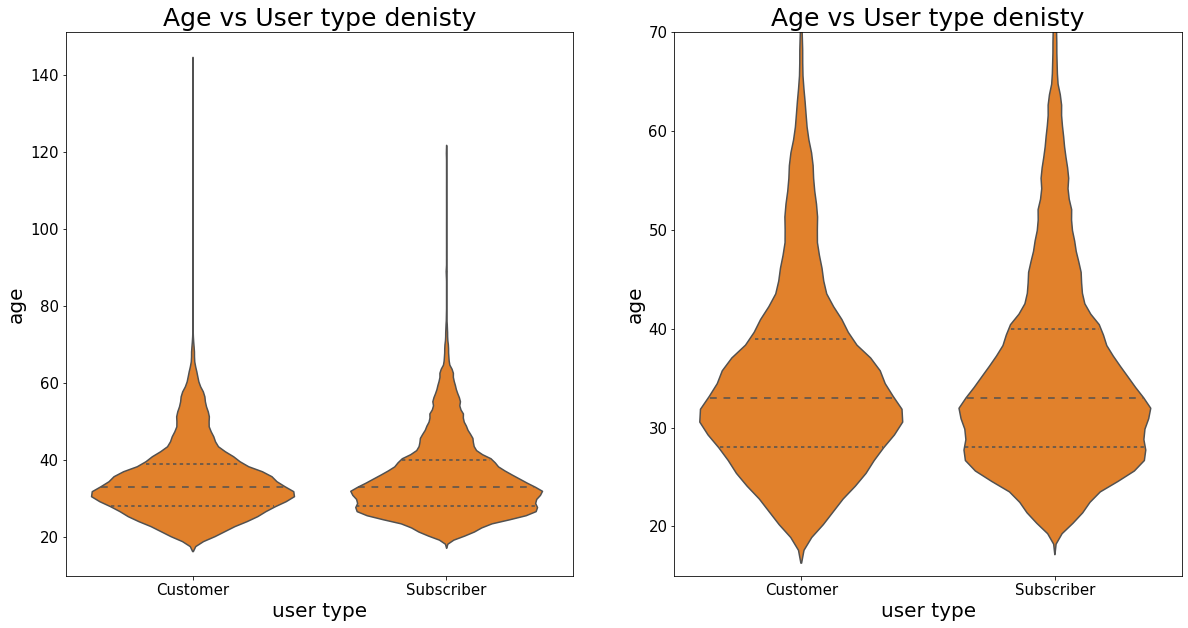

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.violinplot(data =df, x = 'user_type', y = 'age', inner= 'quartile',color= sb.color_palette()[1])
plt.title('Age vs User type denisty', fontsize=25)
plt.ylabel('age',fontsize=20)
plt.xlabel('user type',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sb.violinplot(data =df, x = 'user_type', y = 'age', inner= 'quartile',color= sb.color_palette()[1])
plt.ylim(15,70)
plt.title('Age vs User type denisty', fontsize=25)
plt.ylabel('age',fontsize=20)
plt.xlabel('user type',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### As we can see, subscribers' age vary from 25 to 40 years old while 'customers' age tends to range around 30s.

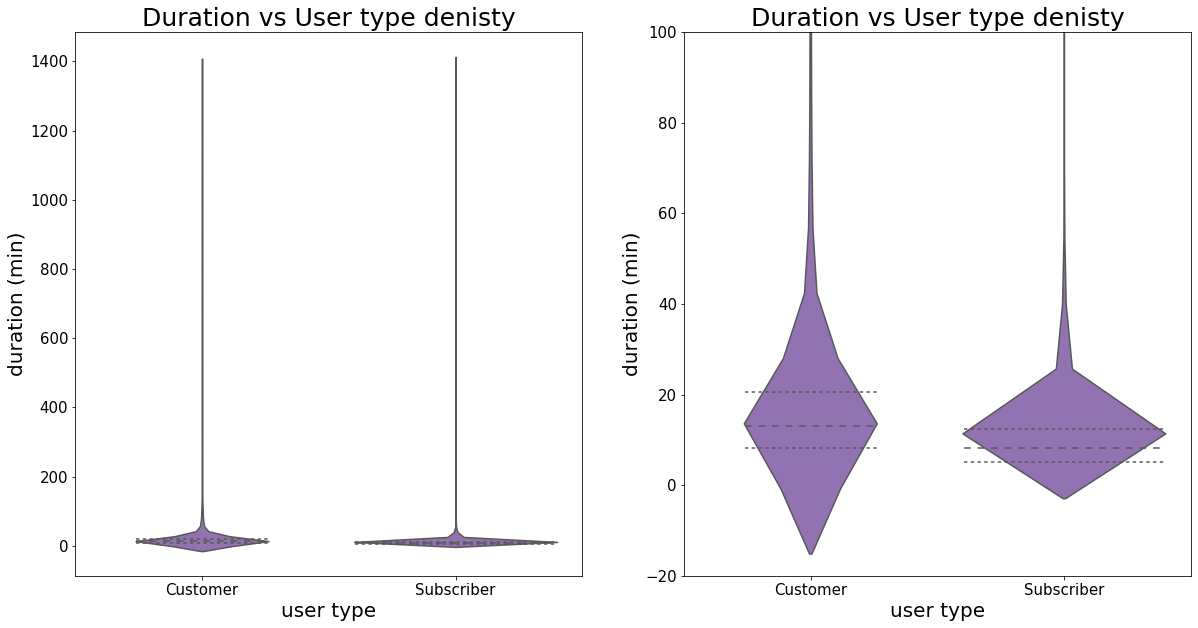

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.violinplot(data =df, x = 'user_type', y = 'duration_min', inner= 'quartile',color= sb.color_palette()[4])
plt.title('Duration vs User type denisty',fontsize=25)
plt.ylabel('duration (min)', fontsize=20)
plt.xlabel('user type',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
sb.violinplot(data =df, x = 'user_type', y = 'duration_min', inner= 'quartile',color= sb.color_palette()[4])
plt.ylim(-20,100)
plt.title('Duration vs User type denisty', fontsize=25)
plt.ylabel('duration (min)',fontsize=20)
plt.xlabel('user type',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### Customers tend to ride bikes for longer periods (around 20 minutes max) compared to Subscribers ( around ~17 minutes max).

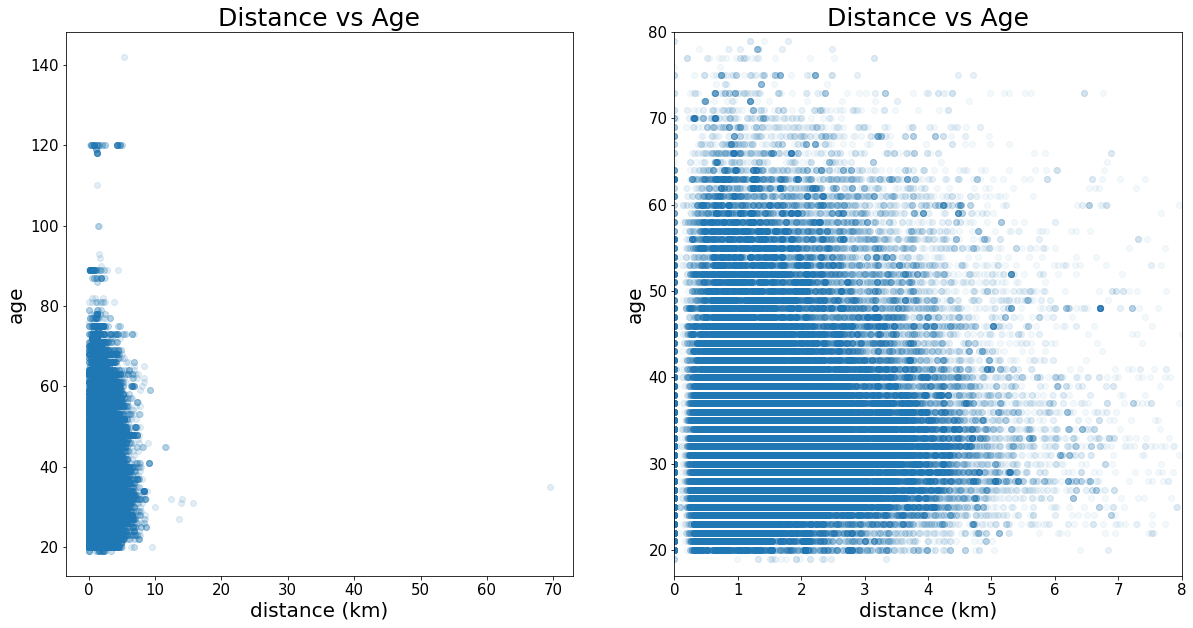

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(data=df, x='distance', y='age', alpha=1/8)
plt.title('Distance vs Age', fontsize=25)
plt.xlabel('distance (km)',fontsize=20)
plt.ylabel('age',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
plt.scatter(data=df, x='distance', y='age', alpha=1/20)
plt.xlim(0,8)
plt.ylim(17,80)
plt.title('Distance vs Age', fontsize=25)
plt.xlabel('distance (km)', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### We notice from the above scatter plot that younger people tend to go for long distance trips compared to older people.

## Age vs Distance

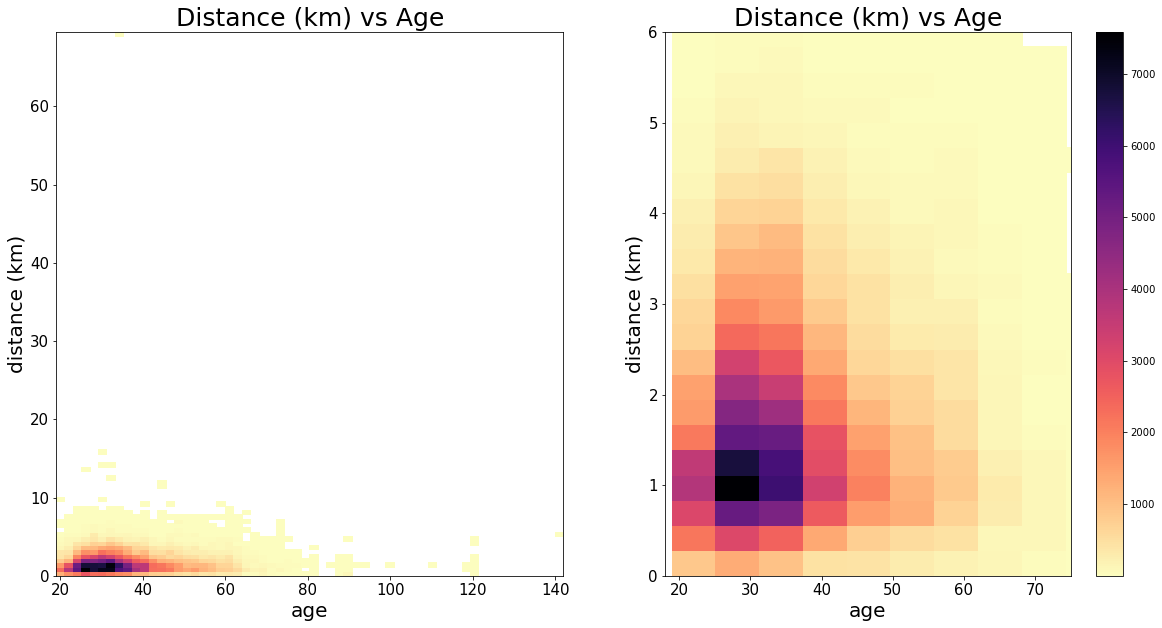

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist2d(data=df, y='distance', x='age', bins=(60,125), cmin=0.5, cmap='magma_r')
plt.title('Distance (km) vs Age', fontsize=25)
plt.ylabel('distance (km)',fontsize=20)
plt.xlabel('age', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
plt.hist2d(data=df, y='distance', x='age', bins=(20,250), cmin=0.5, cmap='magma_r')
plt.ylim(0,6)
plt.xlim(18,75)
plt.title('Distance (km) vs Age', fontsize=25)
plt.ylabel('distance (km)', fontsize=20)
plt.xlabel('age', fontsize=20)
plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### We see here in more details that young people (age 25 to 35) tend to go for distances between 0.5 km to around 2 km.

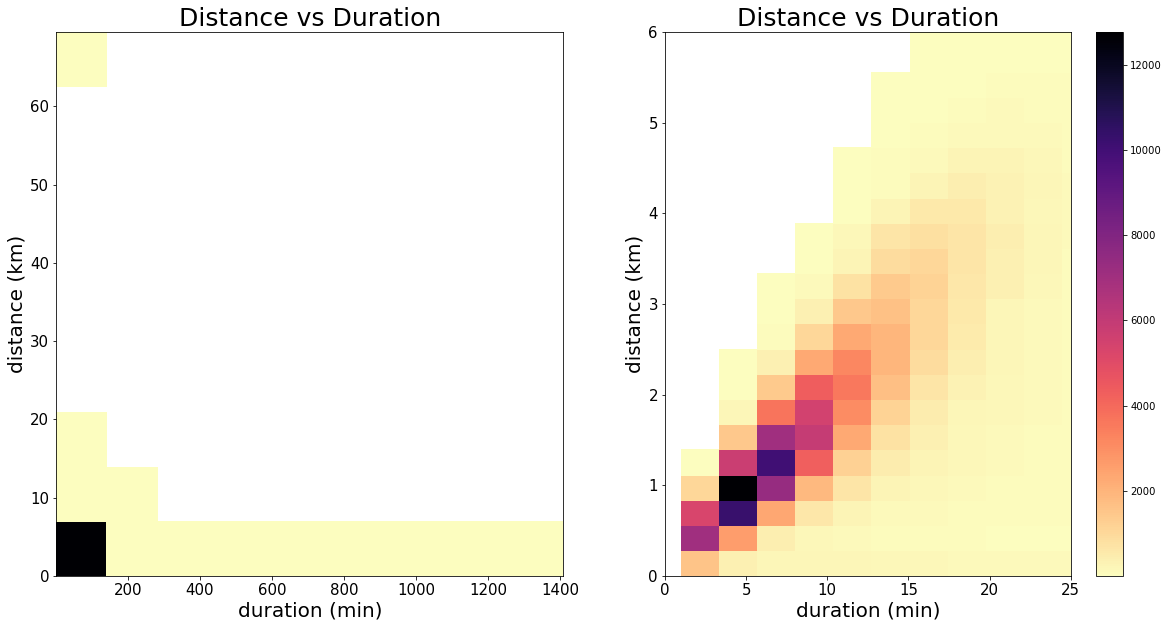

In [75]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist2d(data=df, y='distance', x='duration_min', cmin=0.5, cmap='magma_r')
plt.title('Distance vs Duration',fontsize=25)
plt.ylabel('distance (km)', fontsize=20)
plt.xlabel('duration (min)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
plt.hist2d(data=df, y='distance', x='duration_min', bins=(600,250), cmin=0.5, cmap='magma_r')
plt.ylim(0,6)
plt.xlim(0,25)
plt.title('Distance vs Duration', fontsize=25)
plt.ylabel('distance (km)', fontsize=20)
plt.xlabel('duration (min)', fontsize=20)
plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### We observe from the pervioust plot that most people are able to cross a distance of about 600 m to 1.2 km in less than 5 minutes.
> Also we notice that ratio between the distance and duration is almost fixed.

### How did  the 'distance' vary with other features in the dataset?

> 'distance' our feature of interest varies with age in a way that makes it clear the more the 'age' increases, the less distance one crosses. But most people who ride bikes are between 25 to 40 years old and usually cross a distance between 1 to 1.5 km.

> Also we can conclude that a distance of 1.5 km usually takes under 10 minutes with a bike.

> As for 'member_gender', all the three genders tend to cross the same distance on avrage, but crossing a distance of 1 km seems to be a tren among 'males' while 'females' tend to cross a distance of a little more than just 1 km.

### Relationships between the other features:

> Between 'user_type' and 'member_gender' it's apparent that subscribers make up the majority of Males, Females and other.

> Also, at older ages (+40): between age 50 and 60, 'others' gender tend to ride bikes more than either males or females. But between 45 and 50, 'males' tend to ride bikes more.

> However, at younger ages (20 to 40): 'others' gender tend to ride bikes the most, 'males' come in second then 'females' come last.

> As for 'user_type', subscribers' age vary from 25 to 40 years old while 'customers' age tends to range around 30s.

> Customers tend to ride bikes for longer periods (around 40 minutes max) than Subscribers ( around ~23 minutes max).

## Multivariate Exploration


## Distance vs Duration per gender

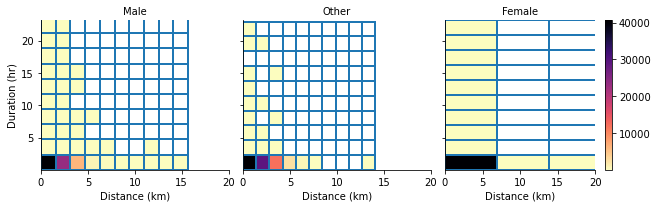

In [124]:
g=sb.FacetGrid(data= df, col='member_gender')
g.map(plt.hist2d, 'distance', 'duration_hr' ,cmin=0.5, cmap='magma_r')
plt.colorbar()
plt.xlim(0,20);
g.set_titles("{col_name}")  # use this argument literally
g.set_axis_labels(y_var="Duration (hr)", x_var='Distance (km)')

#### From the pervious plot, we observe that males tend to cross less than 5 km in about 2.5 hours. However, in the same period of time, females tend to cross about 6 km.

/home/mafuyu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


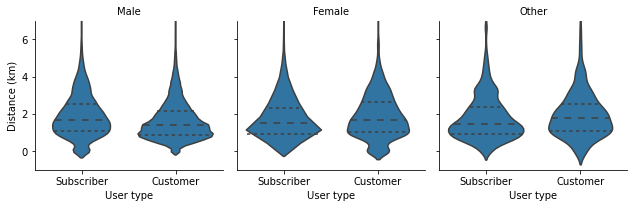

In [122]:
g=sb.FacetGrid(data= df, col='member_gender', col_order=['Male', 'Female', 'Other'])
g.map(sb.violinplot, 'user_type', 'distance', inner='quartile')
plt.ylim(-1, 7);
g.set_titles("{col_name}")  # use this argument literally
g.set_axis_labels(x_var="User type", y_var='Distance (km)')

#### Male subscribers tend to go on longer distances than male customers. But the female customers tend to go on longer distances than female subscribers.

/home/mafuyu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


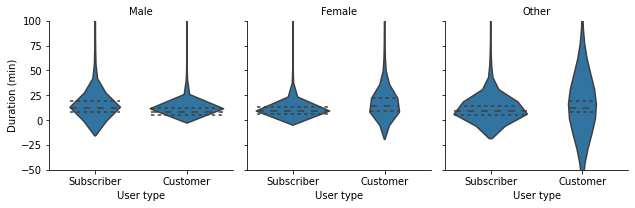

In [121]:
g=sb.FacetGrid(data= df, col='member_gender', col_order=['Male', 'Female', 'Other'])
g.map(sb.violinplot, 'user_type', 'duration_min', inner='quartile')
plt.ylim(-50, 100);
g.set_titles("{col_name}")  # use this argument literally
g.set_axis_labels(x_var="User type", y_var='Duration (min)')

> Majority male customers tend to go on trips that lasts for less than 25 minutes, while majority of male subscribers can last for as long as 50 minutes. 

> While for females, it's the complete opposite, since majority of female subscribers go on trips less than 25 minutes while female customers go for trips that can last for about 50 minute!

### What effect did the gender type, the user type and the duration have on the 'distance'?

> Looking at the duration vs distance heatmap for each gender, we observe that: 
1. males tend to cross less than 5 km in about 2.5 hours
2. however, in the same period of time, females tend to cross about 6 km.

> Looking at the user type vs distance violinplot for each gender, we conclude:
1. Male subscribers tend to go on longer distances than male customers.
2. But the female customers tend to go on longer distances than female subscribers. 

### Surprisingly!

> Majority male customers tend to go on trips that lasts for less than 25 minutes, while majority of male subscribers can last for as long as 50 minutes.

> While for females, it's the complete opposite, since majority of female subscribers go on trips less than 25 minutes while female customers go for trips that can last for about 50 minute!

## Refrences:
> Calculating the distance using coordinates: https://www.kite.com/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python

In [46]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 826240 bytes to slide_deck.slides.html


# Thank you 